##CNN for Fashion MNIST

1. Load in the data
2. Build the model
3. Train the model
4. Evaluate the model
5. Make predictions

In [16]:
import tensorflow as tf
from keras.datasets import fashion_mnist

In [17]:
#load the model
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
train_X= train_X / 255
test_X = test_X / 255

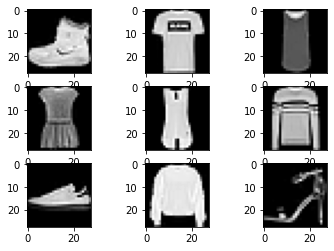

In [18]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [19]:
import numpy as np

print(train_X.shape)
#data only 2D
#conv expects height x width x color
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)
print(train_X.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [20]:
train_y.shape

(60000,)

In [21]:
#numer of classes - number of unique values
K = len(set(train_y))
print('Number of classes:', K)

Number of classes: 10


In [22]:
#instantiate the model
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

i = Input(shape = train_X[0].shape)
#Conv2D(#output feature maps, filter dimensions, strides, activation function, Mode(valid, same, full))
x = Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))(i) 
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten() (x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x= Dense(10, activation='softmax')(x)


model = Model(inputs=i, outputs=x)

# summarize layers
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       73856     
                                                           

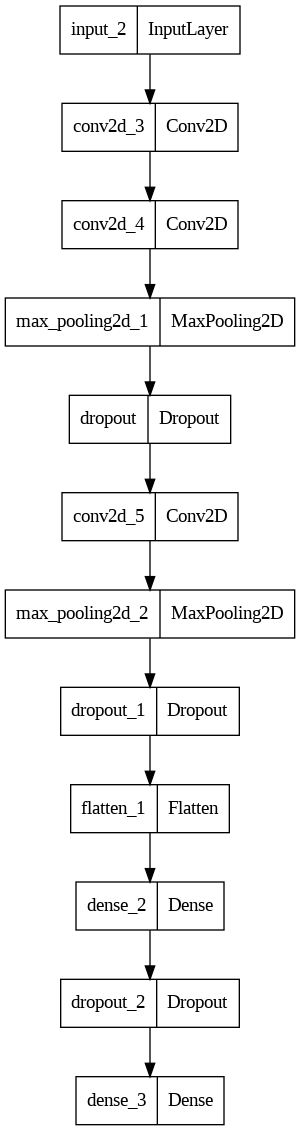

In [23]:
# plot graph
plot_model(model)

In [24]:
#compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#train the model 
r = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 209s 111ms/step - loss: 0.4884 - accuracy: 0.8220 - val_loss: 0.3177 - val_accuracy: 0.8804
Epoch 2/10
1875/1875 [==============================] - 206s 110ms/step - loss: 0.3225 - accuracy: 0.8825 - val_loss: 0.2830 - val_accuracy: 0.8982
Epoch 3/10
1875/1875 [==============================] - 204s 109ms/step - loss: 0.2819 - accuracy: 0.8971 - val_loss: 0.2505 - val_accuracy: 0.9085
Epoch 4/10
1875/1875 [==============================] - 204s 109ms/step - loss: 0.2575 - accuracy: 0.9068 - val_loss: 0.2456 - val_accuracy: 0.9076
Epoch 5/10
1875/1875 [==============================] - 204s 109ms/step - loss: 0.2415 - accuracy: 0.9114 - val_loss: 0.2342 - val_accuracy: 0.9123
Epoch 6/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.2285 - accuracy: 0.9158 - val_loss: 0.2346 - val_accuracy: 0.9134
Epoch 7/10
1875/1875 [==============================] - 204s 109ms/step - loss: 0.2143 - accuracy: 0.9205 - val_

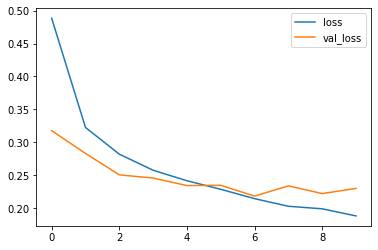

In [25]:
#Plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

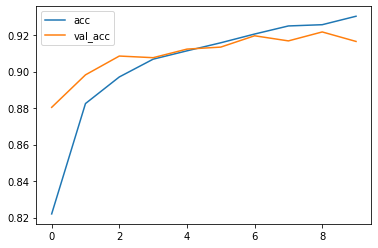

In [26]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label= 'val_acc')
plt.legend()

In [27]:
#evaluate the model 
model.evaluate(train_X, train_y)

1875/1875 [==============================] - 51s 27ms/step - loss: 0.1352 - accuracy: 0.9503


[0.13524842262268066, 0.9503333568572998]

In [28]:
#predict the model 
import numpy as np

y_pred = model.predict(test_X)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 8s 26ms/step


In [36]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

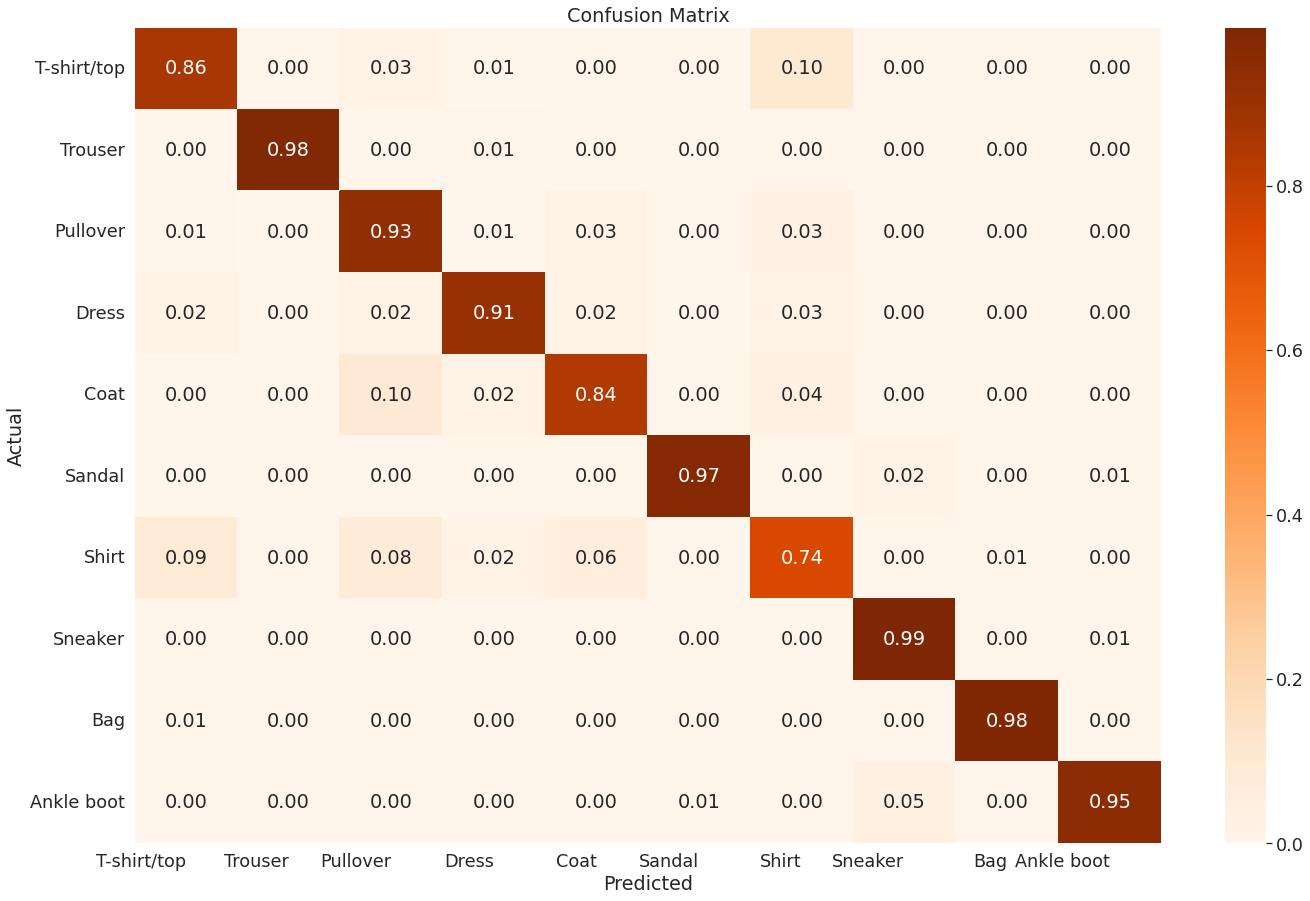

In [35]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_mat = confusion_matrix(test_y, y_pred, normalize='all')
cmn = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(23,15))
sns.heatmap(cmn, annot=True, fmt='.2f',  cmap="Oranges")
sns.set(font_scale=1.6) # for label size
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=0, ha='right')
plt.setp(ax.get_yticklabels(), rotation=0, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show(block=False)

Text(0.5, 1.0, 'True label: T-shirt/top  Predicted: Shirt')

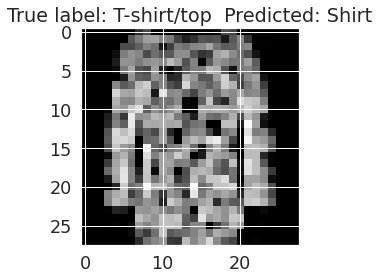

In [42]:
#Show some misclassified examples

missclassified_idx = np.where(y_pred != test_y)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(test_X[i].reshape(28,28), cmap='gray')

plt.title('True label: %s  Predicted: %s' % (labels[test_y[i]], labels[y_pred[i]]))

In [44]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_X, batch_size=32, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(test_y, y_pred_bool))

313/313 [==============================] - 8s 26ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.80      0.93      0.86      1000
           3       0.94      0.91      0.92      1000
           4       0.89      0.84      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.79      0.74      0.76      1000
           7       0.93      0.99      0.96      1000
           8       0.99      0.98      0.99      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

